In [ ]:
import keras
print(keras.__version__)
import tensorflow as tf;
print(tf.__version__)


2.13.1
2.13.0


In [ ]:
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from gensim.corpora.dictionary import Dictionary
from keras.preprocessing.text import Tokenizer, one_hot

In [ ]:
!pip install plot_keras_history

In [ ]:
fullines= pd.read_csv('test.csv',encoding='unicode_escape', header = 0)

#Any pairwise and sequence data can be processed
#Not only for translation OR Everything is "translation"
#For example:
  #Question , Answer pairs
  #Image , caption pairs
  #song , lyric pairs

In [ ]:
print(fullines.head())

       pmid                                               SeqA  \
0  29857264  Exercise-Associated Muscle Cramps (EAMC) are a...   
1  29857264  Despite scientists tried to understand the phy...   
2  29857264  From 1900 to nowadays, the scientific world re...   
3  29857264  However, recent literature seems to focus on t...   
4  29857264  The aim of this review is to examine the recen...   

                                                SeqB  
0  Exercise-Associated Muscle Cramps (EAMC) are a...  
1  Scientists have tried to explain why these cra...  
2  An idea commonly returned to throughout the ye...  
3  Recently, though, more likely explanations are...  
4  The aim of this review is to look at recent re...  


In [ ]:
#Data Preprocessing
#Will differ according to the nature of the data.
#This step is important!!! and time consuming!!!!

#Lowercase
fullines.SeqA=fullines.SeqA.apply(lambda x: x.lower())
fullines.SeqB=fullines.SeqB.apply(lambda x: x.lower())

#remove digits
remove_digits = str.maketrans('', '', digits)
fullines.SeqA=fullines.SeqA.apply(lambda x: x.translate(remove_digits))
fullines.SeqB=fullines.SeqB.apply(lambda x: x.translate(remove_digits))

#Special for Decoder SeqB
fullines.SeqB = fullines.SeqB.apply(lambda x : '$START '+ x + ' END$')

fullines.head()

lines, testlines =  train_test_split(fullines, train_size = 0.7,random_state=2)

In [ ]:
print(fullines.head())

       pmid                                               SeqA  \
0  29857264  exercise-associated muscle cramps (eamc) are a...   
1  29857264  despite scientists tried to understand the phy...   
2  29857264  from  to nowadays, the scientific world retrac...   
3  29857264  however, recent literature seems to focus on t...   
4  29857264  the aim of this review is to examine the recen...   

                                                SeqB  
0  $START exercise-associated muscle cramps (eamc...  
1  $START scientists have tried to explain why th...  
2  $START an idea commonly returned to throughout...  
3  $START recently, though, more likely explanati...  
4  $START the aim of this review is to look at re...  


In [ ]:
#tokenize and index the sequence A

tokenizer_A = Tokenizer()
tokenizer_A.fit_on_texts(lines.SeqA)

seqA = tokenizer_A.texts_to_sequences(lines.SeqA)
print(seqA[0:10])
word_index_A = tokenizer_A.word_index

vocab_size_A = len(word_index_A) + 1  # Adding 1 because of reserved 0 index by Tokenizer
maxlen_A = max(len(x) for x in seqA) # longest text in train set
print('vocabubary size:',vocab_size_A)
print('max length text:',maxlen_A)

[[4, 114, 2, 1, 813, 2, 6, 114, 2, 564, 176, 6, 483, 1069, 155, 2, 1, 150, 7, 22, 430, 161, 1445, 1069, 155, 62, 22, 598, 714, 967], [87, 531, 766, 454, 14, 250, 76, 1, 115, 715, 328], [299, 3, 1163, 2939, 14, 2359, 25, 716, 4153, 3, 185, 14, 1280, 484, 5, 340, 814, 3, 251, 11, 31, 1446, 12, 206], [565, 717, 126, 4154, 5, 10, 7, 4155, 2940, 968, 566, 8, 890, 92, 16, 599, 9, 118, 142, 2360], [7, 485, 567, 45, 14, 673, 1070, 329, 1071, 634, 2361, 217, 355, 58, 186, 137, 29, 485, 356], [72, 110, 14, 132, 7, 6, 386, 341, 66, 227], [1, 265, 26, 28, 12, 4156, 15, 6, 568, 504, 16, 1, 718, 143, 1447], [7, 155, 4157, 716, 228, 24, 4158, 22, 1448, 674, 569, 119, 2, 228, 44, 8, 1281, 1449, 56, 1, 156, 674, 569, 119, 2, 228, 4, 1, 1164, 2, 116, 122], [229, 340, 814, 12, 675, 299, 12, 31, 1682, 3, 1282, 14, 93, 87, 60, 56, 2, 2941], [207, 767, 230, 17, 50, 7, 486, 2942, 1165, 634]]
vocabubary size: 6382
max length text: 96


In [ ]:
#tokenize and index the sequence B

tokenizer_B = Tokenizer(filters='!"#%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',)
tokenizer_B.fit_on_texts(lines.SeqB)

seqB = tokenizer_B.texts_to_sequences(lines.SeqB)
print(seqB[0:10])
word_index_B = tokenizer_B.word_index

print(word_index_B)

vocab_size_B = len(word_index_B) + 1  # Adding 1 because of reserved 0 index by Tokenizer
maxlen_B = max(len(x) for x in seqB) # longest text in train set
print('vocabubary size:',vocab_size_B)
print('max length text:',maxlen_B)

[[2, 118, 82, 9, 22, 495, 1045, 4, 42, 3], [2, 32, 113, 69, 1475, 1046, 6, 459, 78, 1, 112, 3], [2, 141, 530, 14, 636, 5, 370, 825, 9, 676, 1, 107, 179, 164, 1734, 9, 135, 3], [2, 6, 3232, 26, 171, 956, 496, 251, 677, 59, 1301, 1047, 3233, 5, 251, 235, 4, 161, 5, 726, 297, 267, 6, 42, 10, 371, 59, 726, 26, 3], [2, 69, 1476, 531, 78, 1, 678, 346, 5, 69, 41, 235, 133, 14, 298, 12, 1477, 6, 15, 10, 191, 3], [2, 110, 157, 1163, 7, 357, 98, 4, 532, 3], [2, 1, 172, 26, 39, 7, 150, 242, 52, 26, 28, 3234, 25, 7, 882, 573, 18, 1, 533, 115, 957, 3], [2, 212, 574, 11, 2029, 1735, 637, 497, 336, 575, 4, 93, 3], [2, 1, 1478, 12, 1, 138, 4, 299, 601, 1736, 1, 300, 5, 1, 90, 1478, 9, 2030, 3235, 3], [2, 32, 259, 182, 2469, 727, 8, 23, 236, 197, 101, 883, 6, 136, 2470, 5, 3236, 3]]
{'the': 1, '$start': 2, 'end$': 3, 'of': 4, 'and': 5, 'in': 6, 'a': 7, 'to': 8, 'is': 9, 'with': 10, 'that': 11, 'for': 12, 'or': 13, 'are': 14, 'patients': 15, 'blood': 16, 'this': 17, 'by': 18, 'on': 19, 'treatment': 20, 

In [ ]:
# seqA_vec -> encoder -> seqB_vec -> decoder -> seqB_one-hot-matrix (ahead by one timestep)

# First define the vectors' shape with all 0s as value

encoder_input_data = np.zeros((len(seqA), maxlen_A, vocab_size_A), dtype='float32')
decoder_input_data = np.zeros((len(seqA), maxlen_B, vocab_size_B), dtype='float32')
decoder_target_data = np.zeros((len(seqA), maxlen_B, vocab_size_B),dtype='float32')

In [ ]:
#Then populate the word_index as the value
for i, (input_text, target_text) in enumerate(zip(seqA, seqB)):
    for t, word_id in enumerate(input_text):
        encoder_input_data[i, t, word_id] = 1.
#    encoder_input_data[i, t + 1:, input_token_index[' ']] = 1.
    for t, word_id in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, word_id] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, word_id] = 1.0
    #decoder_input_data[i, t + 1:, target_token_index[' ']] = 1.
    #decoder_target_data[i, t:, target_token_index[' ']] = 1.

In [ ]:
#check the index for the first pair
print("encoder:")
print(encoder_input_data[0])
print(decoder_input_data[0])
print("target:")
print(decoder_target_data[0,0])
print(decoder_target_data[0,1])
print(decoder_target_data[0,2])

encoder:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
target:
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
#Build Seq2Seq model using LSTM

embedding_size = 64
hidden_dim = 32

from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
from keras.utils import plot_model


#Encoder Part: {encoder_input -> lstm} -> encoder_states
encoder_inputs = Input(shape=(None, vocab_size_A))
encoder = LSTM(hidden_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]


# Decoder Part:{[decoder_input , encoder_states] ----> lstm} --> last_dense_layer
decoder_inputs = Input(shape=(None, vocab_size_B))
decoder_lstm = LSTM(hidden_dim, return_sequences=True, return_state=True)#define lstm
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,initial_state=encoder_states)#link: [decoder_input,encoder_states] ----> lstm
decoder_dense = Dense(vocab_size_B, activation='softmax')#define last_dense_layer
decoder_outputs = decoder_dense(decoder_outputs)#link:{[decoder_input,encoder_states] ----> lstm} -> last_dense_layer

#Link encoder -> decoder
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, 6382)]         0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None, 5109)]         0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 32),                 821120    ['input_1[0][0]']             
                              (None, 32),                                                         
                              (None, 32)]                                                         
                                                                                              

In [ ]:
#Train the model
hist = model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=8,
          epochs=10,
          validation_split=0.3).history
# Save model
model.save('s2s.h5')

Epoch 1/10
249/249 [==============================] - 76s 304ms/step - loss: 1.4075 - accuracy: 0.0103 - val_loss: 1.3734 - val_accuracy: 0.0103
Epoch 2/10
249/249 [==============================] - 67s 268ms/step - loss: 1.4020 - accuracy: 0.0103 - val_loss: 1.3710 - val_accuracy: 0.0103
Epoch 3/10
249/249 [==============================] - 67s 269ms/step - loss: 1.4016 - accuracy: 0.0103 - val_loss: 1.3725 - val_accuracy: 0.0103
Epoch 4/10
249/249 [==============================] - 68s 273ms/step - loss: 1.4020 - accuracy: 0.0103 - val_loss: 1.3704 - val_accuracy: 0.0103
Epoch 5/10
249/249 [==============================] - 68s 272ms/step - loss: 1.4018 - accuracy: 0.0103 - val_loss: 1.3700 - val_accuracy: 0.0103
Epoch 6/10
249/249 [==============================] - 66s 265ms/step - loss: 1.4011 - accuracy: 0.0103 - val_loss: 1.3765 - val_accuracy: 0.0103
Epoch 7/10
249/249 [==============================] - 72s 289ms/step - loss: 1.4022 - accuracy: 0.0103 - val_loss: 1.3719 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

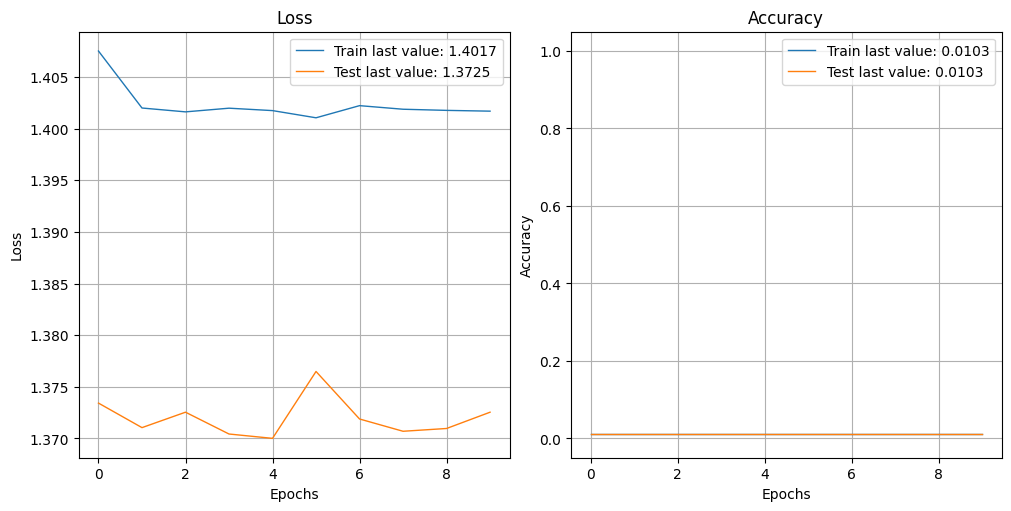

In [ ]:
from plot_keras_history import plot_history
plot_history(hist)

In [ ]:
#define encode_model seperatly as training stage
#(kopi o)--->encoder_states = [state_h, state_c]
encoder_model = Model(encoder_inputs, encoder_states) #reusing the [encoder_inputs,encoder_states]
encoder_model.summary()

#define decoder_model seperatly as training stages
#[_h, _c] for decoder LSTM
decoder_state_input_h = Input(shape=(hidden_dim,))
decoder_state_input_c = Input(shape=(hidden_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# [decoder_input, h_t0, c_t0] for decoder LSTM
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
# predict [h_t1, c_t1]
decoder_states = [state_h, state_c]
# predict [target_Seq_t1]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
decoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 6382)]      0         
                                                                 
 lstm (LSTM)                 [(None, 32),              821120    
                              (None, 32),                        
                              (None, 32)]                        
                                                                 
Total params: 821120 (3.13 MB)
Trainable params: 821120 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None, 5109)]         0         []  

In [ ]:
 ##Encoder(kopi o <pad> <pad> <pad>) = (h0,c0)
    ##(h0,c0) +  $START ----decoder-----> (black,  (h1,c1))
    ##(h1,c1)	+  black -----decoder---->  (coffee, (h2,c2))
    ##(h2,c2)	+  coffee ----decoder-----> (with,   (h3,c3))
    ##(h3,c3)	+  with ------decoder--->   (sugar,  (h4,c4))
    ##(h4,c4)	+  sugar -----decoder---->  (END$,   (h5,c5))

def decode_sequence(input_seq,num_decoder_tokens,encoder_model,decoder_model,vocab_B,max_decoder_seq_length,maxlen_A,vocab_size_A):

    if len(input_seq)==0:
        return [vocab_B['end$']]

    # Encode the input as state vectors.
    ##Encoder(kopi o <pad> <pad> <pad>) = (h0,c0)

    encoder_input_text = np.zeros((1, maxlen_A, vocab_size_A), dtype='float32')
    for t, word_id in enumerate(input_seq):
        encoder_input_text[0, t, word_id] = 1.

    states_value = encoder_model.predict(encoder_input_text)

    # Generate empty target sequence of word_token.
    target_seq = np.zeros((1, 1, num_decoder_tokens))

    # Initialize with $start
    target_seq[0, 0, vocab_B['$start']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1 (greedy decoding)).
    stop_condition = False
    decoded_word_index = []

    while not stop_condition:
        ##(h0,c0) +  $START ----decoder-----> (???,  (h1,c1))
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Predict the best token (black)
        predict_token_index = np.argmax(output_tokens[0, -1, :])
        decoded_word_index.append(predict_token_index)

        # Exit condition: either hit max length # or find stop character.
        if (predict_token_index == vocab_B['end$'] or len(decoded_word_index) > max_decoder_seq_length):
            stop_condition = True

        ##(h1,c1)	+  black -----decoder---->  (???, (h2,c2))

        # Update the target sequence to the predict word_token
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, predict_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_word_index

In [ ]:
#Try with the first row

print(seqA[0])
r = decode_sequence(seqA[0],vocab_size_B,encoder_model,decoder_model,word_index_B,maxlen_B,maxlen_A,vocab_size_A)
print (r)

1/1 [==============================] - 0s 31ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
# Creating a reverse dictionary

reverse_word_map_A = dict(map(reversed, tokenizer_A.word_index.items()))
reverse_word_map_B = dict(map(reversed, tokenizer_B.word_index.items()))

# Function takes a tokenized sentence and returns the words
def indexSeq_to_text_A(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map_A.get(letter) for letter in list_of_indices]
    return(words)

def indexSeq_to_text_B(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map_B.get(letter) for letter in list_of_indices]
    return(words)

print(indexSeq_to_text_A(seqA[0]))
print(indexSeq_to_text_B(r))

In [ ]:
#Translater for a list of seqA to seqB
def testSeq2Sq(listOfSeqA):
    listOfSeqB=[]
    token_seqA = tokenizer_A.texts_to_sequences(listOfSeqA)

    for a in token_seqA:
        r = decode_sequence(a,vocab_size_B,encoder_model,decoder_model,word_index_B,maxlen_B,maxlen_A,vocab_size_A)
        tokens_b = indexSeq_to_text_B(r)
        sentB = ' '.join(tokens_b)
        listOfSeqB.append(sentB)

    return listOfSeqB

In [ ]:
evaluation= pd.read_csv('val.csv', header = 0)
sample_val=evaluation[:10]
decode_sample_val = testSeq2Sq(sample_val.input_text)
sample_val['summarized'] = decode_sample_val
sample_val.head()

IndexError: ignored